In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [3]:
df.describe()

Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

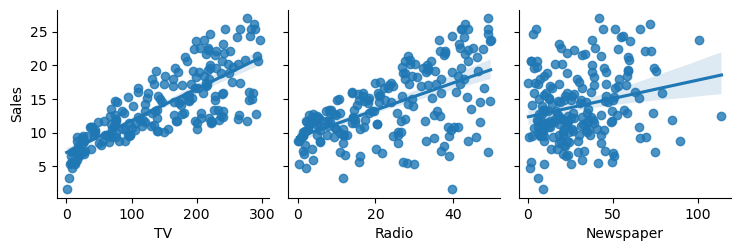

In [4]:
# Checking main assumptions of Linear Regression: linearity, normality, multicollinearity and homoscedasticity.
# 1) Assumption (Linearity)
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")

Sales         1.000000
TV            0.782224
Radio         0.576223
Newspaper     0.228299
Unnamed: 0   -0.051616
Name: Sales, dtype: float64


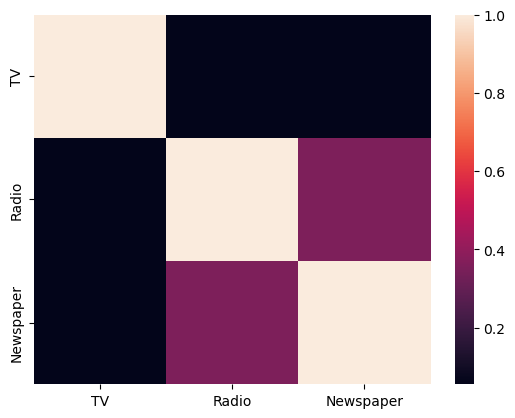

In [5]:
import matplotlib.pyplot as plt

# 2) Assumption (Multicollinearity):
df_features = df[["TV","Radio","Newspaper"]]
a = df.corr()['Sales'].sort_values(ascending=False)
print(a)

sns.heatmap(data=df_features.corr())
plt.show()

In [6]:
dataset = df.values
# extract the features (independent variables)
X = dataset[:,1:4]
print(X[0:10])

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]]


In [7]:
# extract the dependent (target) variable
y = dataset[:,4]
print(y[0:10])

[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_2, y_train, y_2 = train_test_split(X, y, random_state=0, train_size=0.80)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, random_state=0, train_size=0.50)

from sklearn.linear_model import LinearRegression
lregr = LinearRegression()
#from sklearn.linear_model import SGDRegressor
#sgdr_scaled = SGDRegressor()

# train model (Fit linear model) and evaluate model β coefficients
# NON Standardized
print("NON Standardized")
model = lregr.fit(X_train, y_train)
# print model intercept
print("β0 =", model.intercept_)
# print model coefficients
print("[β1,β2,β3] =", model.coef_)

# estimate residuals
# predict
y_pred = model.predict(X_val)
# residuals is the differences between real y values and predicted y values
residuals = y_val - y_pred
print('Residuals:',residuals[:10])
#print(np.mean(residuals))
#print(np.std(residuals))

NON Standardized
β0 = 2.99489303049533
[β1,β2,β3] = [ 0.04458402  0.19649703 -0.00278146]
Residuals: [ 0.11256448  2.16206142 -9.18318566  0.21444367  0.62679197 -1.90974587
 -2.03802209  0.9477193   0.30597666  0.03544328]


Mean of Residuals -0.3493365859840921
Standard deviation of Residuals 2.6771233895165207
p-value: 2.47109006150533e-05


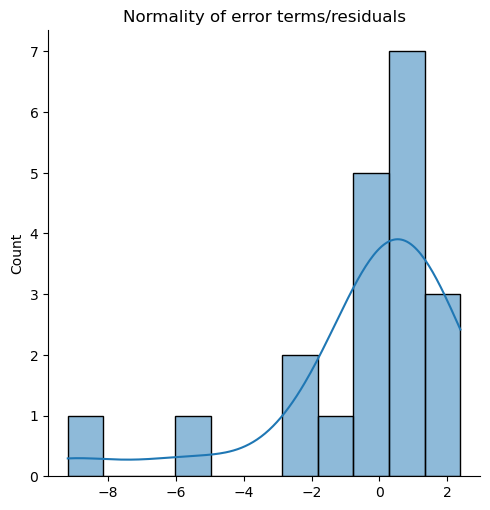

'\nmean_scaled_residuals = np.mean(residuals_scaled)\nprint("Mean of Scaled Residuals {}".format(mean_scaled_residuals))\nstd_scaled_residuals = np.std(residuals_scaled)\nprint("Standard deviation of Scaled Residuals {}".format(std_scaled_residuals))\n_, p = stats.normaltest(residuals_scaled)\nprint("p-value:",p)\n\nsns.displot(data=residuals_scaled,kde=True)\nplt.title(\'Normality of error terms/residuals (scaled)\')\nplt.show()\n'

In [9]:
from scipy import stats

# 3) Assumption (Normality of error terms/residuals):
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
std_residuals = np.std(residuals)
print("Standard deviation of Residuals {}".format(std_residuals))
_, p = stats.normaltest(residuals)
print("p-value:",p)

sns.displot(data=residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()

"""
mean_scaled_residuals = np.mean(residuals_scaled)
print("Mean of Scaled Residuals {}".format(mean_scaled_residuals))
std_scaled_residuals = np.std(residuals_scaled)
print("Standard deviation of Scaled Residuals {}".format(std_scaled_residuals))
_, p = stats.normaltest(residuals_scaled)
print("p-value:",p)

sns.displot(data=residuals_scaled,kde=True)
plt.title('Normality of error terms/residuals (scaled)')
plt.show()
"""

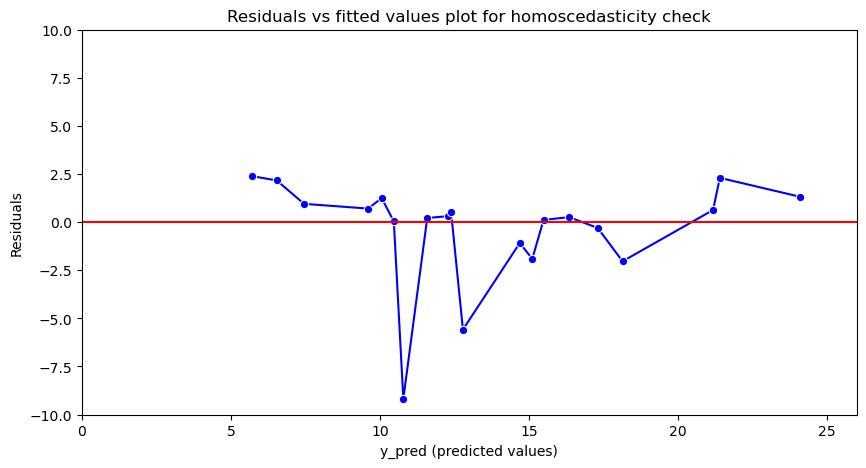

"\nplt.figure(figsize=(10,5))\nsns.lineplot(x=y_scaled_pred,y=residuals_scaled,marker='o',color='blue')\nplt.xlabel('y_scaled_pred (predicted values)')\nplt.ylabel('Scaled Residuals')\nplt.ylim(-1,1)\nplt.xlim(0,2.5)\nsns.lineplot(x=[0,2.5],y=[0,0],color='red')\nplt.title('Scaled Residuals vs fitted values plot for homoscedasticity check')\nplt.show()\n"

In [10]:
# 4) Homoscedasticity
plt.figure(figsize=(10,5))
sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred (predicted values)')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot(x=[0,26],y=[0,0],color='red')
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()
"""
plt.figure(figsize=(10,5))
sns.lineplot(x=y_scaled_pred,y=residuals_scaled,marker='o',color='blue')
plt.xlabel('y_scaled_pred (predicted values)')
plt.ylabel('Scaled Residuals')
plt.ylim(-1,1)
plt.xlim(0,2.5)
sns.lineplot(x=[0,2.5],y=[0,0],color='red')
plt.title('Scaled Residuals vs fitted values plot for homoscedasticity check')
plt.show()
"""

0.039750209255936864


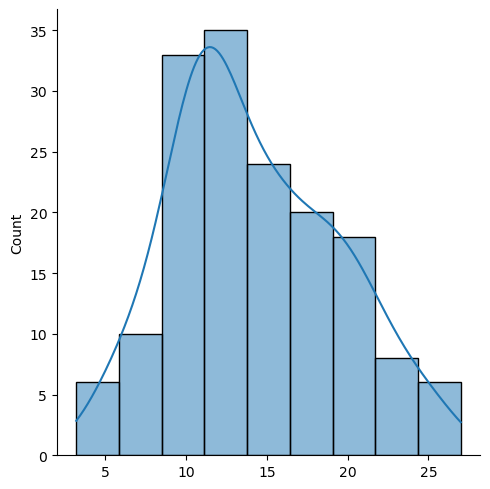

In [11]:
# distribution plot of the target variable
sns.displot(y_train, kde=True)

# statistical test
# computing the p-value for the null-hypothesis that this distribution is a normal distribution
from scipy import stats
_, p = stats.normaltest(y_train)
print(p)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# train scaler
X_train_scaled = sc.fit_transform(X_train)
print(X_train_scaled[0:10])
# apply scaler on validation set
X_val_scaled = sc.transform(X_val)
#print(X_val_scaled[0:10])
print("Mean of first feature:", np.mean(X_train_scaled[:,0]), "\nStdev of first feature:", np.std(X_train_scaled[:,0]))

[[-1.34155345  1.0355176   1.65941078]
 [-1.4053143   0.08249594 -1.30629738]
 [-0.08995151  0.40243892 -0.81980897]
 [ 0.69761311 -0.18979597 -0.90868666]
 [ 0.76609699  0.01442296  1.28518893]
 [-0.56461564  0.42286082 -1.01627544]
 [-1.67570755 -1.44914602 -1.36243065]
 [-1.57770476  1.38268978  2.77272078]
 [-0.29304164  0.91979354  2.29558792]
 [-0.54218127 -1.20408331  0.19994556]]
Mean of first feature: -6.397660179402465e-16 
Stdev of first feature: 1.0


[4.79407796 4.35326964 6.0707102  6.32143636 6.64564903 5.78373694
 2.45296201 4.06788525 6.32143636 4.66122092]
0.394752462959251
[6.23861518 4.06788525 0.53413021 5.11650958 7.82340912 5.54719501
 6.37624568 3.95772581 5.36536406 4.69465565]


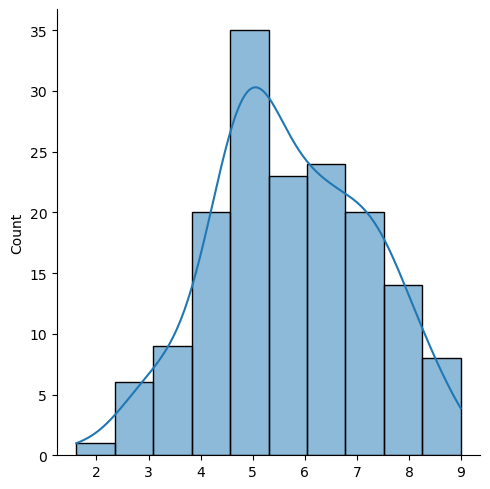

In [13]:
# y - transformation (box cox)
from scipy.stats import boxcox
# Target variable values are transformed to be unskewed
# Apply box-cox on training dataset to estimate λ parameter
y_train_scaled, lambda_bc = boxcox(y_train)
print(y_train_scaled[0:10])
_, p = stats.normaltest(y_train_scaled)
print(p)
sns.displot(y_train_scaled, kde=True)

# estimate the parameter λ on the training data set, then use the estimated value 
# to apply the transformation to the training and test data set to avoid data leakage
y_val_scaled = boxcox(y_val, lambda_bc)
print(y_val_scaled[0:10])

In [14]:
lregr_scaled = LinearRegression()

# train model (Fit linear model) and evaluate model β coefficients
# Standardized
model_scaled = lregr_scaled.fit(X_train_scaled, y_train_scaled)
# print model intercept
print("β0 =", model_scaled.intercept_)
# print model coefficients
print("[β1,β2,β3] =", model_scaled.coef_)

# estimate residuals
# predict
y_pred_scaled = model_scaled.predict(X_val_scaled)

from scipy.special import inv_boxcox
residuals_scaled =  inv_boxcox(y_val_scaled, lambda_bc) - inv_boxcox(y_pred_scaled, lambda_bc)
print('Residuals:', residuals_scaled[:10])
#print(np.mean(residuals_scaled))
#print(np.std(residuals_scaled))

β0 = 5.719657352358076
[β1,β2,β3] = [ 1.1333148   0.80643841 -0.01058377]
Residuals: [ 0.48492454  1.52707582 -8.66374883  0.63438947  0.32773813 -1.71205256
 -2.1147736   0.59612666  0.5576195   0.07184391]


In [15]:
# METRICS ON THE ORIGINAL DATASET
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# prediction on validation data
# Unstandardized model
y_pred = model.predict(X_val)
print(y_pred[0:10])

# Mean Squared Error (MSE)
MSE = mean_squared_error(y_val, y_pred)
# Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_val, y_pred)
print("MSE:" , MSE, ", RMSE:", RMSE, ", R2:", r2)

[15.48743552  6.53793858 10.78318566 11.58555633 21.17320803 15.10974587
 18.13802209  7.4522807  12.29402334 10.46455672]
MSE: 7.289025693003447 , RMSE: 2.699819566749498 , R2: 0.7703057423991149


In [16]:
# Standardized model
y_pred_scaled = model_scaled.predict(X_val_scaled)
print(y_pred_scaled[0:10])

# Mean Squared Error (MSE)
MSE_scaled = mean_squared_error(y_val_scaled, y_pred_scaled)
# Root Mean Squared Error (RMSE)
RMSE_scaled = np.sqrt(MSE_scaled)
r2_scaled = r2_score(y_val_scaled, y_pred_scaled)
print("MSE:",MSE_scaled,", RMSE:", RMSE_scaled, ", R2:", r2_scaled)

# REVERSE TRANSFORMATION TO BRING target values to the original scale
from scipy.special import inv_boxcox
y_pred_unscaled = inv_boxcox(y_pred_scaled, lambda_bc)
print(y_pred_unscaled[0:10])

# Mean Squared Error (MSE)
MSE_unscaled = mean_squared_error(y_val, y_pred_unscaled)
# Root Mean Squared Error (RMSE)
RMSE_unscaled = np.sqrt(MSE_unscaled)
r2_unscaled = r2_score(y_val, y_pred_unscaled)
print("MSE:",MSE_unscaled,", RMSE:", RMSE_unscaled, ", R2:", r2_unscaled)

[6.1031528  3.48671325 4.61542317 4.9135169  7.74539677 6.04583725
 6.93744089 3.73323155 5.19271617 4.67064996]
MSE: 1.0787997132391625 , RMSE: 1.0386528357633085 , R2: 0.6630640925730389
[15.11507546  7.17292418 10.26374883 11.16561053 21.47226187 14.91205256
 18.2147736   7.80387334 12.0423805  10.42815609]
MSE: 6.010514707137693 , RMSE: 2.451635108889105 , R2: 0.8105946155766224
